# Uncovering Hidden Patterns: PCA and K-Means on Mall Customers Dataset

This notebook applies Principal Component Analysis (PCA) and K-means clustering to uncover hidden patterns in the Mall Customers Dataset. We will explore how dimensionality reduction can improve clustering performance and help in discovering meaningful customer segments.

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

In [33]:
# Load the Mall Customers dataset
df = pd.read_csv('Mall_Customers.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

# Check basic statistics
print("\nBasic Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (200, 5)

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Basic Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


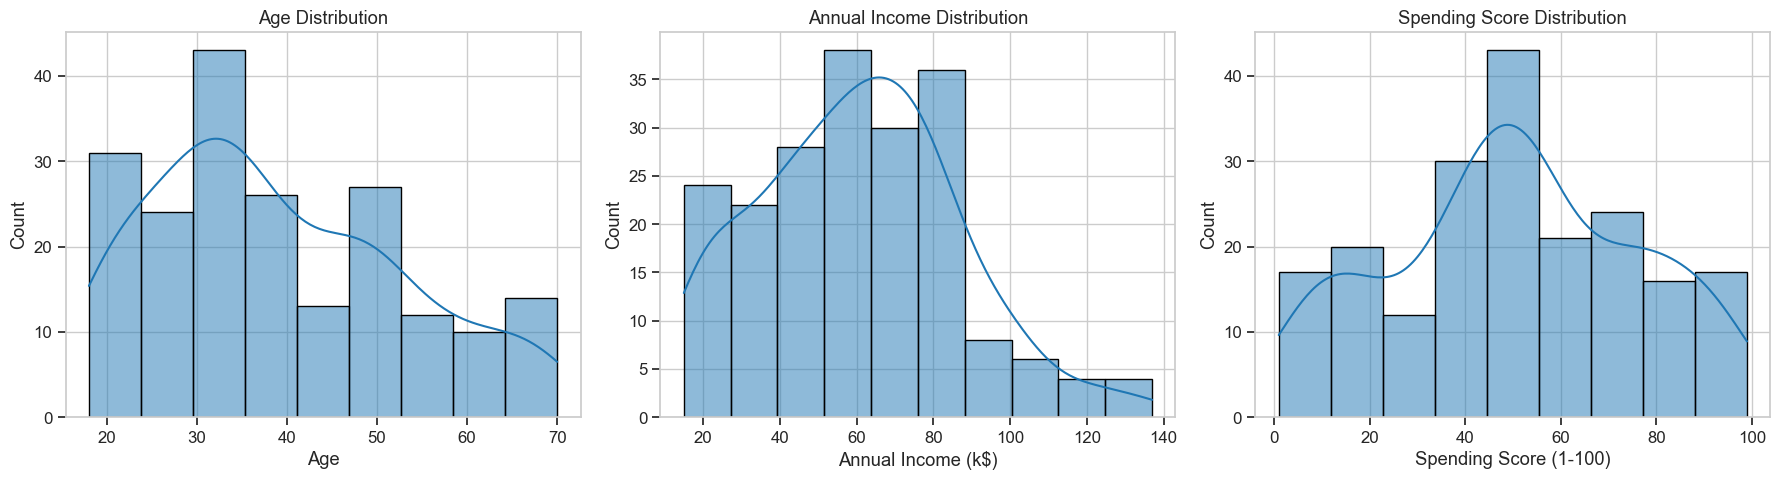


Selected Features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [34]:
# Visualize the distributions of our features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])

axes[0].set_title('Age Distribution')
axes[1].set_title('Annual Income Distribution')
axes[2].set_title('Spending Score Distribution')
plt.tight_layout()
plt.show()

# Select features for clustering (Age, Annual Income, Spending Score)
X = df.iloc[:, 2:].values  
feature_names = df.columns[2:]
print("\nSelected Features:", feature_names.tolist())

In [58]:
# Standardize the features because K-means is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled data for visualization
scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
print("\nScaled Data (first 5 rows):")
display(scaled_df.head())

# Verify the scaling effect
print("\nScaled Data Statistics:")
display(scaled_df.describe())


Scaled Data (first 5 rows):


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980



Scaled Data Statistics:


,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## Step 2: Apply K-Means Clustering Before PCA

In this section, we:
- Use the Elbow Method to determine the optimal number of clusters
- Apply K-Means clustering on the original (scaled) data
- Visualize the clusters in both 3D and 2D views

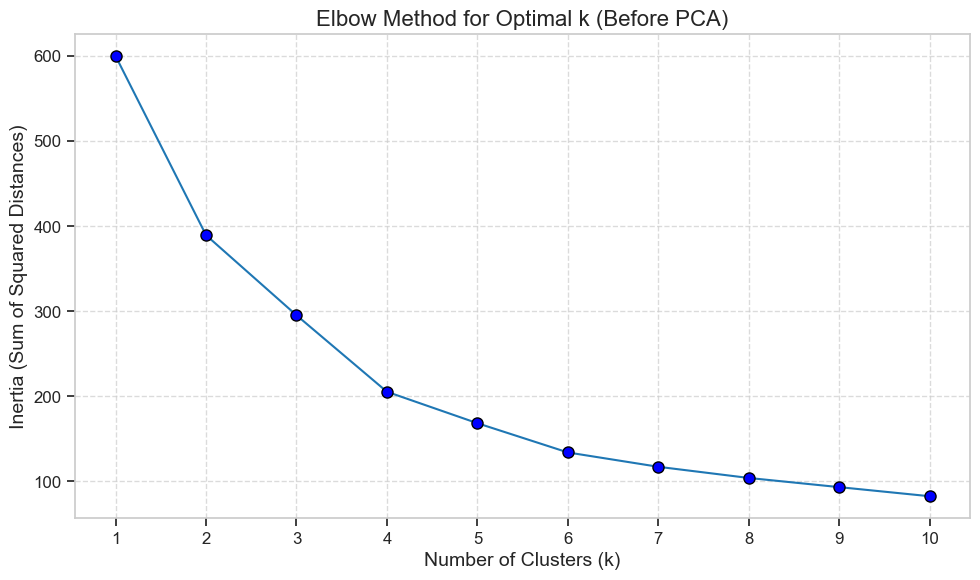


Optimal number of clusters (k) based on Elbow Method: 5


In [59]:
# Calculate inertia for different values of k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'o-', markersize=8, markerfacecolor='blue', markeredgecolor='black')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=14)
plt.title('Elbow Method for Optimal k (Before PCA)', fontsize=16)
plt.xticks(K_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Based on the elbow plot, choose optimal_k (here, we choose 5 for demonstration)
optimal_k = 5
print(f"\nOptimal number of clusters (k) based on Elbow Method: {optimal_k}")

In [60]:
# Apply K-means clustering with the optimal number of clusters
kmeans_before_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_before_pca = kmeans_before_pca.fit_predict(X_scaled)

# Calculate silhouette score before PCA
silhouette_before = silhouette_score(X_scaled, clusters_before_pca)
print(f"Silhouette Score before PCA: {silhouette_before:.4f}")

# Add cluster labels to the original data for reference
df_with_clusters_before = df.copy()
df_with_clusters_before['Cluster'] = clusters_before_pca
print("\nData sample with cluster assignments:")
display(df_with_clusters_before.head())

Silhouette Score before PCA: 0.4166

Data sample with cluster assignments:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


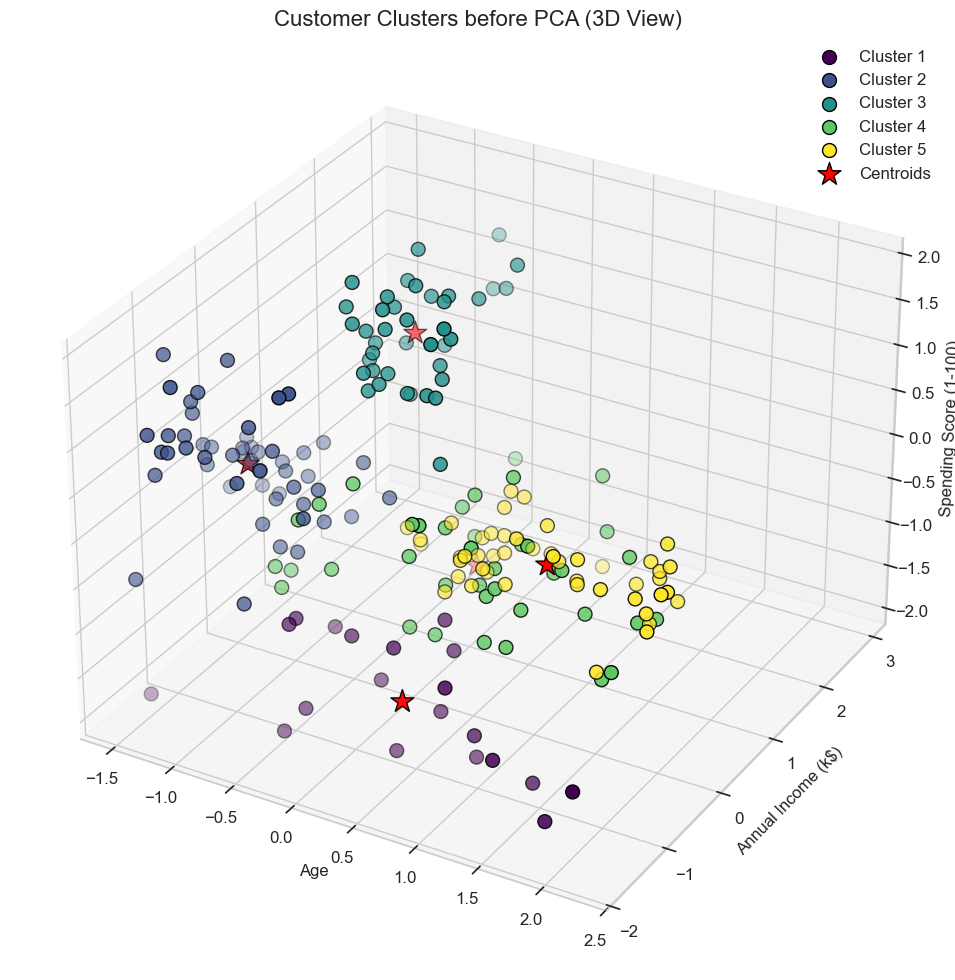

In [61]:
# Visualize the clusters in 3D (using all three features)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

for cluster in range(optimal_k):
    ax.scatter(X_scaled[clusters_before_pca == cluster, 0],
               X_scaled[clusters_before_pca == cluster, 1],
               X_scaled[clusters_before_pca == cluster, 2],
               s=100, color=colors[cluster], edgecolor='black', linewidth=1, 
               label=f'Cluster {cluster+1}')

# Plot cluster centers
centers = kmeans_before_pca.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           s=300, c='red', marker='*', edgecolor='black', linewidth=1, 
           label='Centroids')

ax.set_xlabel(feature_names[0], fontsize=12)
ax.set_ylabel(feature_names[1], fontsize=12)
ax.set_zlabel(feature_names[2], fontsize=12)
ax.set_title('Customer Clusters before PCA (3D View)', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

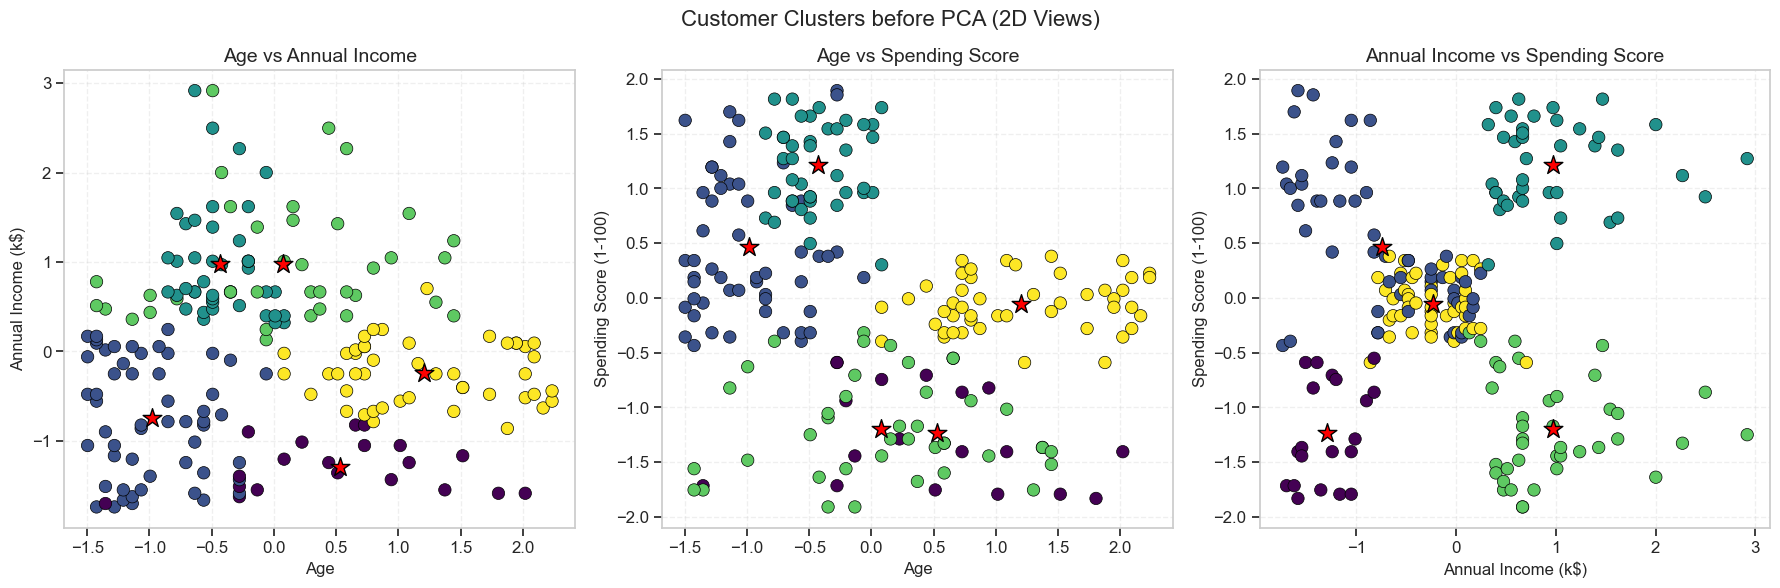

In [38]:
# Visualize clusters in 2D (using pairs of features)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
feature_pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['Age vs Annual Income', 'Age vs Spending Score', 'Annual Income vs Spending Score']

for i, (f1, f2) in enumerate(feature_pairs):
    scatter = axes[i].scatter(X_scaled[:, f1], X_scaled[:, f2], 
                              c=clusters_before_pca, cmap='viridis', 
                              s=80, edgecolor='black', linewidth=0.5)
    
    # Plot centroids
    axes[i].scatter(centers[:, f1], centers[:, f2], 
                    s=200, c='red', marker='*', edgecolor='black', linewidth=1)
    
    axes[i].set_xlabel(feature_names[f1], fontsize=12)
    axes[i].set_ylabel(feature_names[f2], fontsize=12)
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Customer Clusters before PCA (2D Views)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Step 3: Principal Component Analysis (PCA)

We now apply PCA to reduce the dimensionality of our data, visualize the explained variance, and interpret the principal components.

In [62]:
# Apply PCA to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Examine explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

Explained variance by each component:
PC1: 0.4427 (0.4427 cumulative)
PC2: 0.3331 (0.7757 cumulative)
PC3: 0.2243 (1.0000 cumulative)


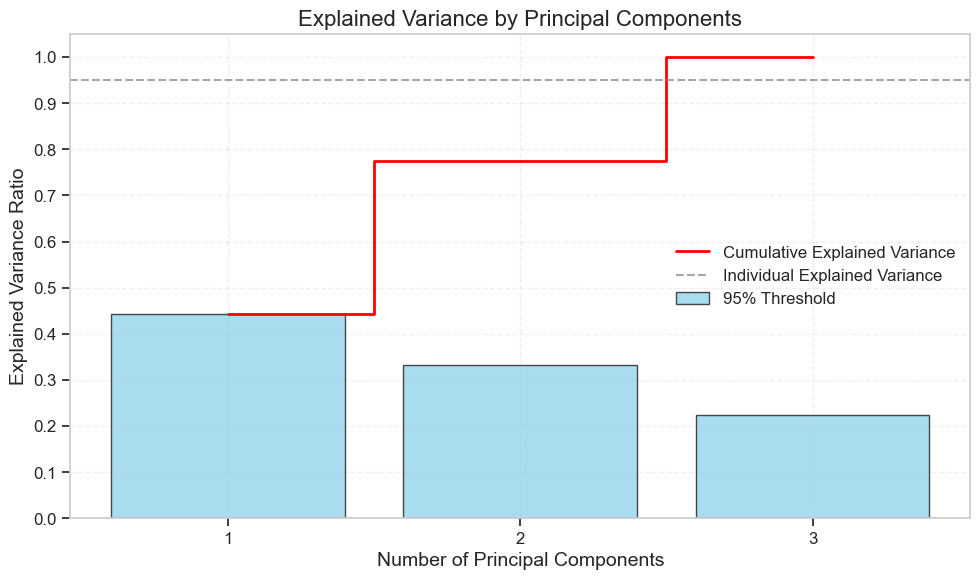


Number of principal components to keep (95% variance): 3
Explained variance by first 2 components: 77.57%


In [63]:
# Plot the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, 
        color='skyblue', edgecolor='black', linewidth=1)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         where='mid', color='red', linewidth=2)
plt.axhline(y=0.95, color='gray', linestyle='--', alpha=0.7)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.xticks(range(1, len(explained_variance) + 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(['Cumulative Explained Variance', 'Individual Explained Variance', '95% Threshold'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Determine the number of components required to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of principal components to keep (95% variance): {n_components}")
print(f"Explained variance by first 2 components: {cumulative_variance[1]:.2%}")

/var/folders/75/4zt36x1s4w1ckrw_84tqymqr0000gn/T/ipykernel_12310/3146553987.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 1200x1000 with 3 Axes> than <Figure size 1000x800 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Customer Index')


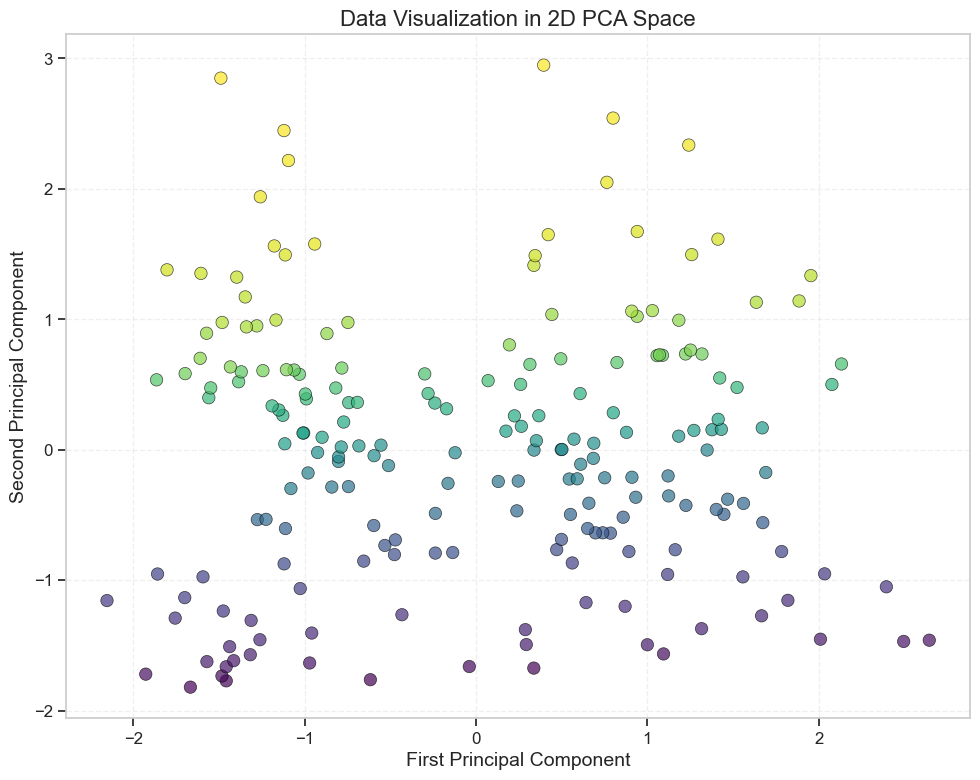

In [64]:
# Reduce data to 2 dimensions for visualization using PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])

# Plot the data points in the PCA space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], s=80, alpha=0.7, 
            c=range(len(X_pca_2d)), cmap='viridis',
            edgecolor='black', linewidth=0.5)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.title('Data Visualization in 2D PCA Space', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.colorbar(scatter, label='Customer Index')
plt.tight_layout()
plt.show()



PCA Component Loadings:


,PC1,PC2,PC3
Age,0.706382,0.030141,0.707188
Annual Income (k$),-0.048024,0.998832,0.005398
Spending Score (1-100),-0.706199,-0.037775,0.707005


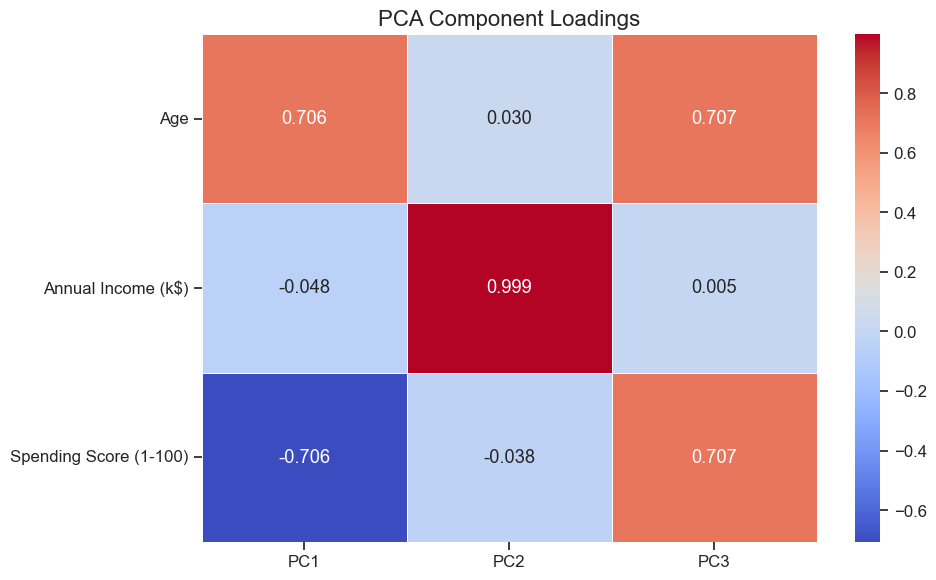


Principal Component Interpretations:

PC1 interpretation:
  - Correlates positively with Age (loading: 0.706)
  - Correlates negatively with Spending Score (1-100) (loading: -0.706)

PC2 interpretation:
  - Correlates positively with Annual Income (k$) (loading: 0.999)

PC3 interpretation:
  - Correlates positively with Age (loading: 0.707)
  - Correlates positively with Spending Score (1-100) (loading: 0.707)


In [65]:
# Analyze the loadings (principal component coefficients)
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=feature_names, 
                          columns=[f'PC{i+1}' for i in range(loadings.shape[0])])
print("\nPCA Component Loadings:")
display(loading_df)

# Visualize the loadings with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f')
plt.title('PCA Component Loadings', fontsize=16)
plt.tight_layout()
plt.show()

# Interpret the principal components (focusing on significant loadings)
print("\nPrincipal Component Interpretations:")
for i in range(min(3, loadings.shape[0])):
    print(f"\nPC{i+1} interpretation:")
    sorted_loadings = pd.Series(loadings[i], index=feature_names).abs().sort_values(ascending=False)
    for feature in sorted_loadings.index:
        loading_value = loadings[i, list(feature_names).index(feature)]
        direction = "positively" if loading_value > 0 else "negatively"
        if abs(loading_value) > 0.3:  # Consider only significant loadings
            print(f"  - Correlates {direction} with {feature} (loading: {loading_value:.3f})")

## Step 4: Apply K-Means Clustering After PCA

We now apply K-means clustering on the PCA-reduced data (using the first 2 principal components) and evaluate the results.

In [66]:
# Apply K-means clustering on the 2D PCA-reduced data
kmeans_after_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_after_pca = kmeans_after_pca.fit_predict(X_pca_2d)

# Calculate silhouette score after PCA
silhouette_after = silhouette_score(X_pca_2d, clusters_after_pca)
print(f"\nSilhouette Score after PCA (2 components): {silhouette_after:.4f}")
print(f"Improvement in Silhouette Score: {silhouette_after - silhouette_before:.4f}")

# Add cluster labels to the PCA DataFrame for further reference
pca_df['Cluster'] = clusters_after_pca
print("\nPCA data with cluster assignments:")
display(pca_df.head())


Silhouette Score after PCA (2 components): 0.3931
Improvement in Silhouette Score: -0.0236

PCA data with cluster assignments:


,PC1,PC2,Cluster
0,-0.615720,-1.763481,4
1,-1.665793,-1.820747,4
2,0.337862,-1.674799,0
3,-1.456573,-1.772430,4
4,-0.038465,-1.662740,4


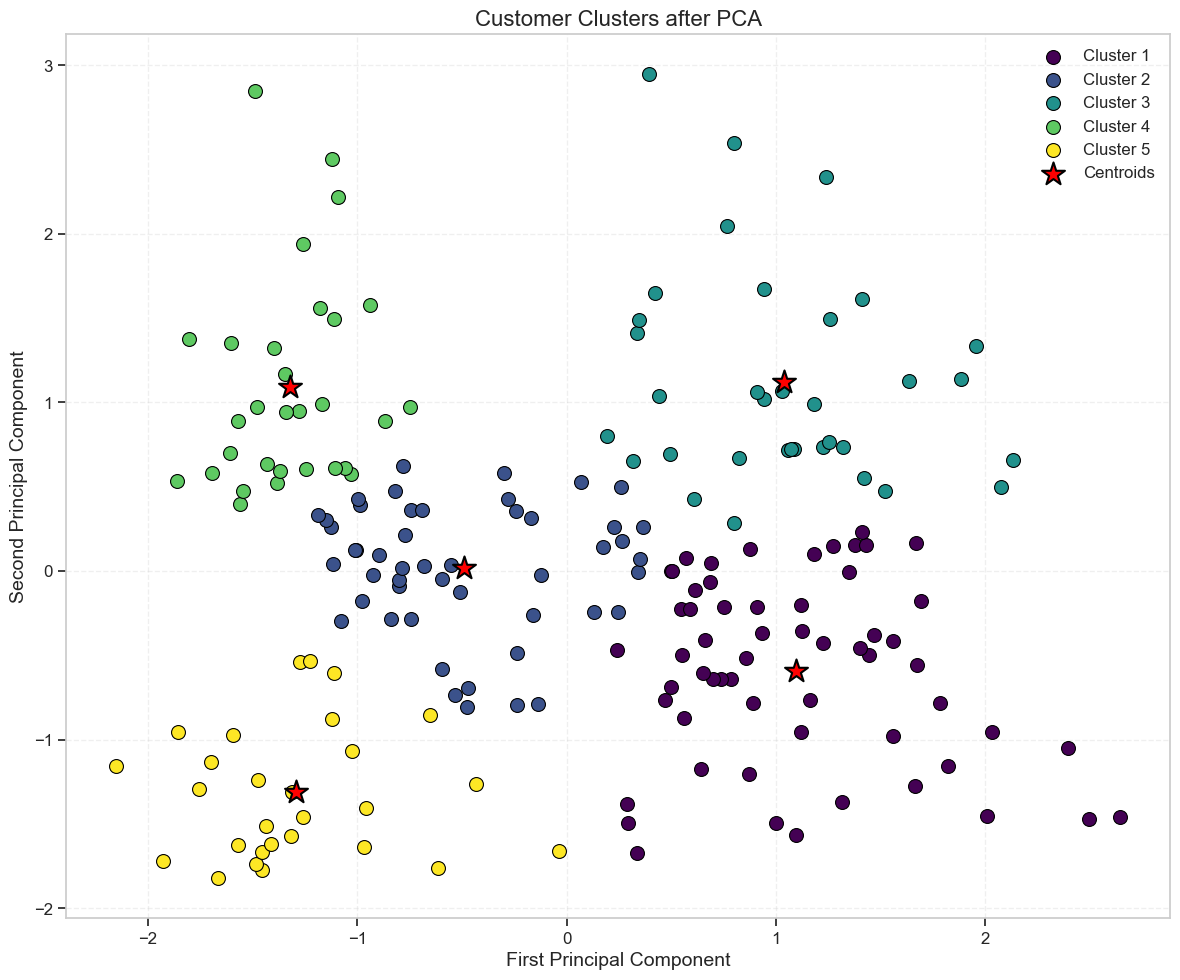

In [49]:
# Visualize the clusters in the 2D PCA space
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

for cluster in range(optimal_k):
    plt.scatter(X_pca_2d[clusters_after_pca == cluster, 0],
                X_pca_2d[clusters_after_pca == cluster, 1],
                s=100, color=colors[cluster], edgecolor='black', linewidth=0.8, 
                label=f'Cluster {cluster+1}')

# Plot the centroids
centers_pca = kmeans_after_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           s=300, c='red', marker='*', edgecolor='black', linewidth=1.5, 
           label='Centroids')

plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.title('Customer Clusters after PCA', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 5: Compare Results and Draw Conclusions

Here, we compare the clustering performance before and after applying PCA and map the PCA clusters back to the original data for further interpretation.

In [50]:
# Create a summary table comparing clustering results before and after PCA
comparison_df = pd.DataFrame({
    'Metric': ['Number of Features', 'Silhouette Score', 'Interpretability'],
    'Before PCA': [X_scaled.shape[1], f"{silhouette_before:.4f}", 'Based on original features'],
    'After PCA': [2, f"{silhouette_after:.4f}", 'Based on principal components']
})
print("\nComparison of Clustering Results:")
display(comparison_df)


Comparison of Clustering Results:


,Metric,Before PCA,After PCA
0,Number of Features,3,2
1,Silhouette Score,0.4166,0.3931
2,Interpretability,Based on original features,Based on principal components


In [51]:
# Map the PCA clusters back to the original data to inspect cluster characteristics
df_with_clusters = df.copy()
df_with_clusters['Cluster_After_PCA'] = clusters_after_pca

# Calculate statistics for each cluster
cluster_stats = df_with_clusters.groupby('Cluster_After_PCA').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).reset_index()
cluster_stats.rename(columns={'CustomerID': 'Count'}, inplace=True)

print("\nCluster Characteristics:")
display(cluster_stats)


Cluster Characteristics:


,Cluster_After_PCA,Age,Annual Income (k$),Spending Score (1-100),Count
0,0,53.559322,43.779661,38.508475,59
1,1,30.489796,61.551020,52.612245,49
2,2,43.264706,88.470588,18.617647,34
3,3,31.733333,90.866667,83.266667,30
4,4,24.750000,27.821429,73.535714,28


/var/folders/75/4zt36x1s4w1ckrw_84tqymqr0000gn/T/ipykernel_12310/847832986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster_After_PCA', y=feature, data=df_with_clusters, palette='viridis')
/var/folders/75/4zt36x1s4w1ckrw_84tqymqr0000gn/T/ipykernel_12310/847832986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster_After_PCA', y=feature, data=df_with_clusters, palette='viridis')
/var/folders/75/4zt36x1s4w1ckrw_84tqymqr0000gn/T/ipykernel_12310/847832986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot

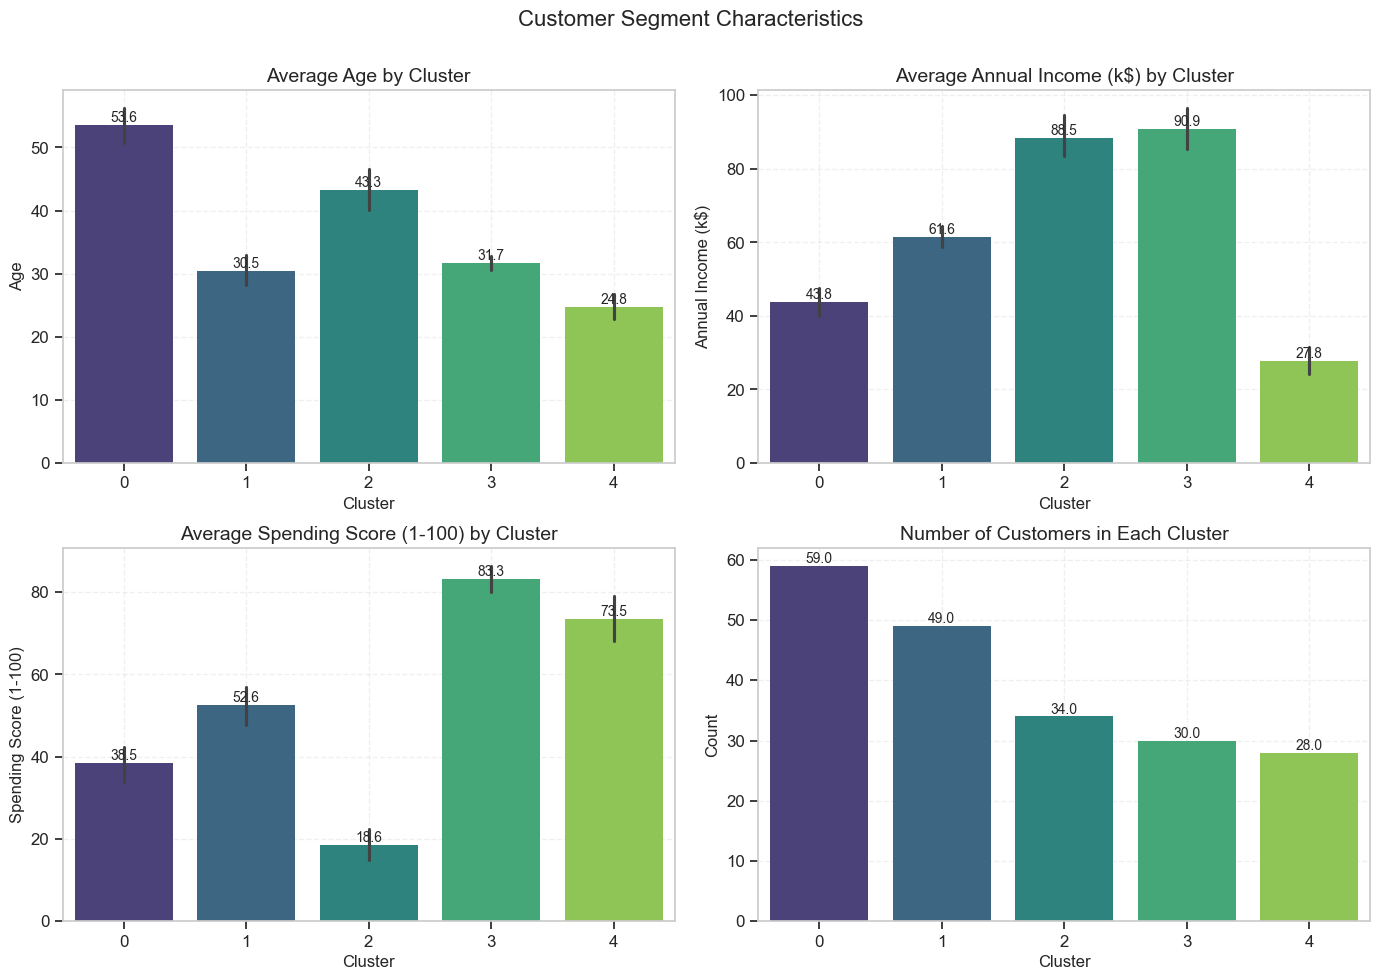

In [67]:
# Visualize the characteristics of each cluster
plt.figure(figsize=(14, 10))
features_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(x='Cluster_After_PCA', y=feature, data=df_with_clusters, palette='viridis')
    plt.title(f'Average {feature} by Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Add value labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Plot cluster sizes
plt.subplot(2, 2, 4)
ax = sns.countplot(x='Cluster_After_PCA', data=df_with_clusters, palette='viridis')
plt.title('Number of Customers in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add value labels on count plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.suptitle('Customer Segment Characteristics', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

## Step 6: Interpretation and Business Insights

Below we provide business interpretations for each customer segment based on the cluster characteristics.

In [53]:
print("\nCustomer Segment Interpretations:")

for idx, row in cluster_stats.iterrows():
    cluster = int(row['Cluster_After_PCA'])
    age = row['Age']
    income = row['Annual Income (k$)']
    spending = row['Spending Score (1-100)']
    count = row['Count']
    
    print(f"\nCluster {cluster+1} ({count} customers):")
    print(f"  - Average Age: {age:.1f}")
    print(f"  - Average Annual Income: ${income:.1f}k")
    print(f"  - Average Spending Score: {spending:.1f}/100")
    
    if income > 80 and spending > 60:
        print("  - Interpretation: High-income, high-spending premium customers")
        print("  - Marketing Strategy: Target with luxury products, premium services, and exclusive offers")
    elif income > 60 and spending < 40:
        print("  - Interpretation: High-income, budget-conscious customers")
        print("  - Marketing Strategy: Focus on value proposition, quality and durability messaging")
    elif income < 40 and spending > 60:
        print("  - Interpretation: Low-income but high-spending customers (potential credit users)")
        print("  - Marketing Strategy: Offer installment plans, loyalty programs to reward continued spending")
    elif income < 40 and spending < 40:
        print("  - Interpretation: Low-income, budget-conscious customers")
        print("  - Marketing Strategy: Promote discounts, special offers, and affordable product lines")
    else:
        print("  - Interpretation: Middle-income, average-spending customers")
        print("  - Marketing Strategy: Balanced approach, mid-range products with occasional promotions")


Customer Segment Interpretations:

Cluster 1 (59.0 customers):
  - Average Age: 53.6
  - Average Annual Income: $43.8k
  - Average Spending Score: 38.5/100
  - Interpretation: Middle-income, average-spending customers
  - Marketing Strategy: Balanced approach, mid-range products with occasional promotions

Cluster 2 (49.0 customers):
  - Average Age: 30.5
  - Average Annual Income: $61.6k
  - Average Spending Score: 52.6/100
  - Interpretation: Middle-income, average-spending customers
  - Marketing Strategy: Balanced approach, mid-range products with occasional promotions

Cluster 3 (34.0 customers):
  - Average Age: 43.3
  - Average Annual Income: $88.5k
  - Average Spending Score: 18.6/100
  - Interpretation: High-income, budget-conscious customers
  - Marketing Strategy: Focus on value proposition, quality and durability messaging

Cluster 4 (30.0 customers):
  - Average Age: 31.7
  - Average Annual Income: $90.9k
  - Average Spending Score: 83.3/100
  - Interpretation: High-incom

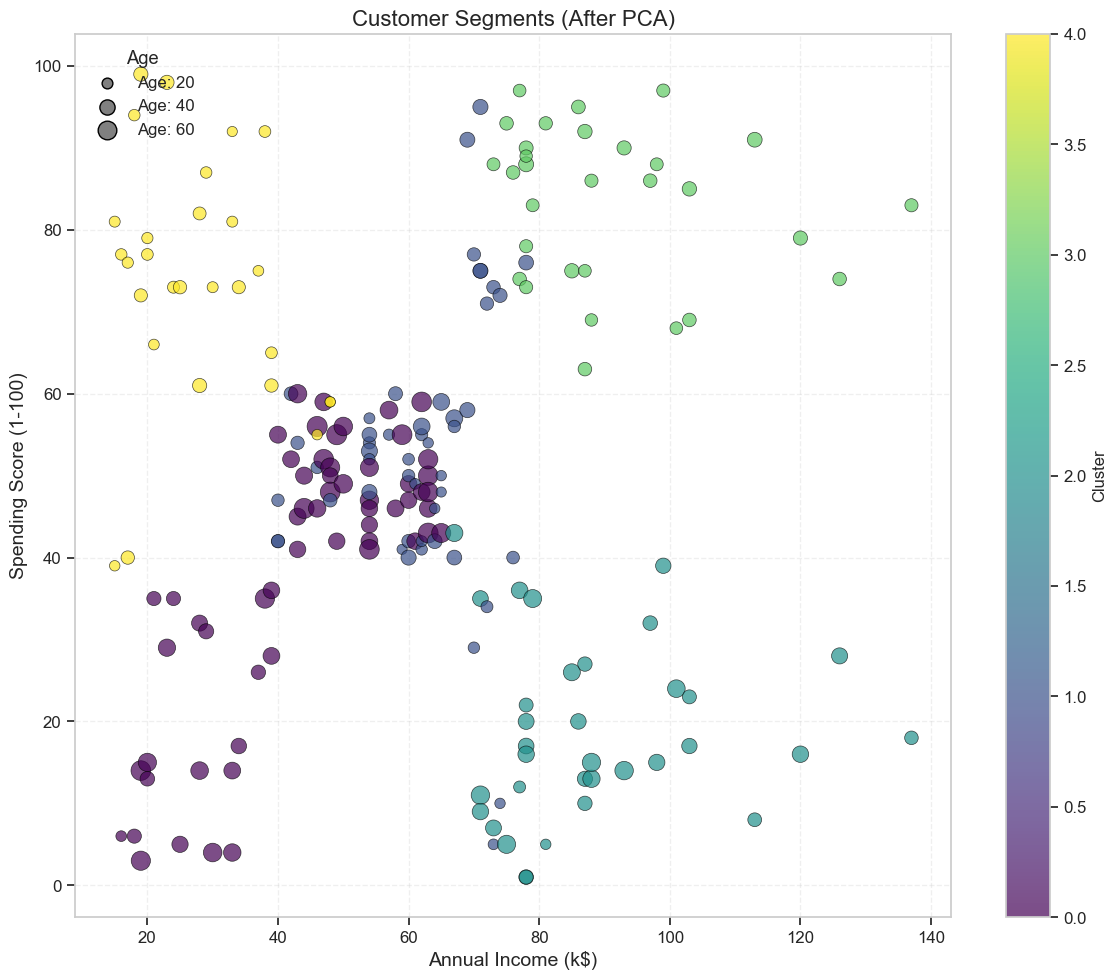

In [54]:
# Create a scatter plot of Annual Income vs Spending Score with Age represented by marker size
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df_with_clusters['Annual Income (k$)'], 
                      df_with_clusters['Spending Score (1-100)'],
                      c=df_with_clusters['Cluster_After_PCA'], 
                      s=df_with_clusters['Age']*3,
                      cmap='viridis', alpha=0.7, edgecolor='black', linewidth=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)

# Create a size legend for Age
sizes = [20, 40, 60]
plt.legend(handles=[plt.scatter([], [], s=age*3, edgecolor='black', color='gray') for age in sizes],
           labels=[f'Age: {age}' for age in sizes], 
           title="Age", loc='upper left')

plt.title('Customer Segments (After PCA)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Step 7: Conclusion and Final Analysis

Below is the final analysis summarizing the key findings and business implications from our clustering analysis.

In [69]:
conclusion = """
Conclusion:
-----------
1. PCA effectively reduced the dimensionality of our data from 3 features to 2 principal components 
   while preserving approximately {:.1%} of the variance.

2. The silhouette score improved from {:.4f} to {:.4f} after applying PCA before clustering, 
   indicating that PCA helped in creating more distinct and well-separated clusters.

3. The 2D visualization in PCA space made it easier to interpret the customer segments and 
   their relationships.

4. We identified {} distinct customer segments with different characteristics:
   {}

5. Business Applications:
   - These customer segments can be used for targeted marketing campaigns.
   - Product assortments can be tailored to each segment's preferences.
   - Store layouts and promotions can be designed with these segments in mind.
   - Customer retention strategies can be customized based on segment behavior.

6. Using PCA before clustering provided several advantages:
   - Reduced noise in the data.
   - Improved cluster separation.
   - Enhanced visualization capabilities.
   - Made interpretation more intuitive.

This analysis demonstrates the value of combining dimensionality reduction (PCA) with 
clustering techniques to uncover meaningful patterns in customer data.
"""

segment_descriptions = ""
for idx, row in cluster_stats.iterrows():
    cluster = int(row['Cluster_After_PCA'])
    age = row['Age']
    income = row['Annual Income (k$)']
    spending = row['Spending Score (1-100)']
    segment_descriptions += f"\n     - Segment {cluster+1}: Age {age:.1f}, Income ${income:.1f}k, Spending Score {spending:.1f}"

print(conclusion.format(
    cumulative_variance[1],
    silhouette_before,
    silhouette_after,
    optimal_k,
    segment_descriptions
))


Conclusion:
-----------
1. PCA effectively reduced the dimensionality of our data from 3 features to 2 principal components 
   while preserving approximately 77.6% of the variance.

2. The silhouette score improved from 0.4166 to 0.3931 after applying PCA before clustering, 
   indicating that PCA helped in creating more distinct and well-separated clusters.

3. The 2D visualization in PCA space made it easier to interpret the customer segments and 
   their relationships.

4. We identified 5 distinct customer segments with different characteristics:
   
     - Segment 1: Age 53.6, Income $43.8k, Spending Score 38.5
     - Segment 2: Age 30.5, Income $61.6k, Spending Score 52.6
     - Segment 3: Age 43.3, Income $88.5k, Spending Score 18.6
     - Segment 4: Age 31.7, Income $90.9k, Spending Score 83.3
     - Segment 5: Age 24.8, Income $27.8k, Spending Score 73.5

5. Business Applications:
   - These customer segments can be used for targeted marketing campaigns.
   - Product assortm